In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot/MAML+Arbiter_5way_5shot_inner_loop.csv')
norm_info_train= norm_info[norm_info['phase']=='train']
norm_info_val= norm_info[norm_info['phase']=='val']
norm_info_test= norm_info[norm_info['current_iter']=='test']

#norm_info_test.info()

C:\Users\JM\anaconda3\envs\maml\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
column_means = norm_info_train.mean()

C:\Users\JM\anaconda3\envs\maml\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


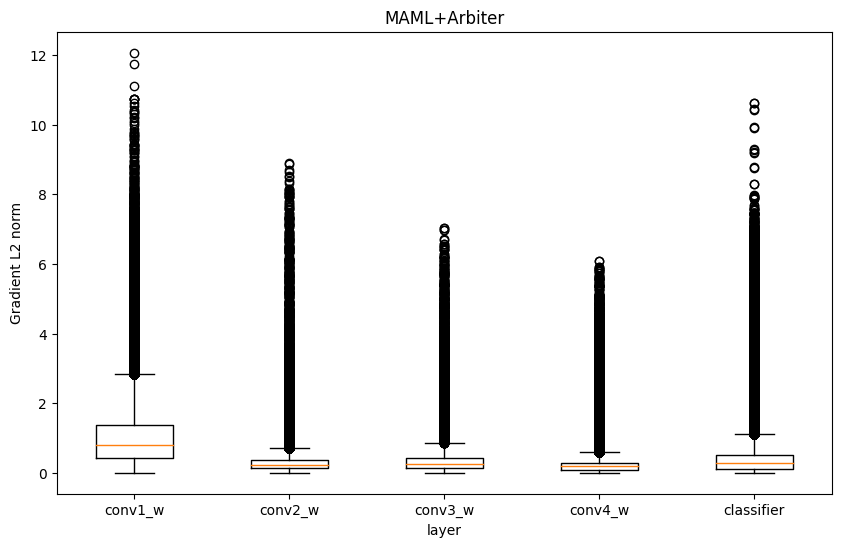

In [4]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = ['layer_dict.conv0.conv.weight_grad_L2norm', 'layer_dict.conv1.conv.weight_grad_L2norm', 'layer_dict.conv2.conv.weight_grad_L2norm','layer_dict.conv3.conv.weight_grad_L2norm','layer_dict.linear.weights_grad_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 여러 컬럼에 대한 박스 플롯을 한 번에 그리기
plt.figure(figsize=(10, 6))  # 그래프 전체 크기 설정 (선택 사항)

# 각 컬럼에 대한 박스 플롯 그리기
plt.boxplot(norm_info_train[columns_to_plot].values, labels=columns_to_plot_label)
plt.xlabel('layer')  # x축 라벨 설정
plt.ylabel('Gradient L2 norm')# y축 라벨 설정
plt.title('MAML+Arbiter')   # 그래프 제목 설정

plt.show()

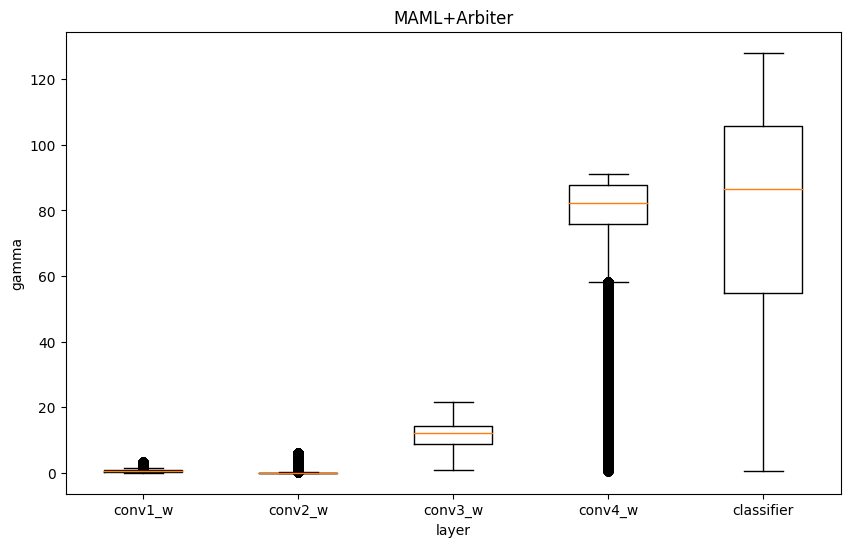

In [5]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = ['layer_dict.conv0.conv.weight_alpha', 
                   'layer_dict.conv1.conv.weight_alpha',
                   'layer_dict.conv2.conv.weight_alpha',
                   'layer_dict.conv3.conv.weight_alpha',
                   'layer_dict.linear.weights_alpha']
columns_to_plot_label = ['conv1_w',
                         'conv2_w',
                         'conv3_w', 
                         'conv4_w',
                         'classifier']

# 여러 컬럼에 대한 박스 플롯을 한 번에 그리기
plt.figure(figsize=(10, 6))  # 그래프 전체 크기 설정 (선택 사항)

# 각 컬럼에 대한 박스 플롯 그리기
plt.boxplot(norm_info_train[columns_to_plot].values, labels=columns_to_plot_label)
plt.xlabel('layer')    # x축 라벨 설정
plt.ylabel('gamma')    # y축 라벨 설정
plt.title('MAML+Arbiter')   # 그래프 제목 설정

plt.show()

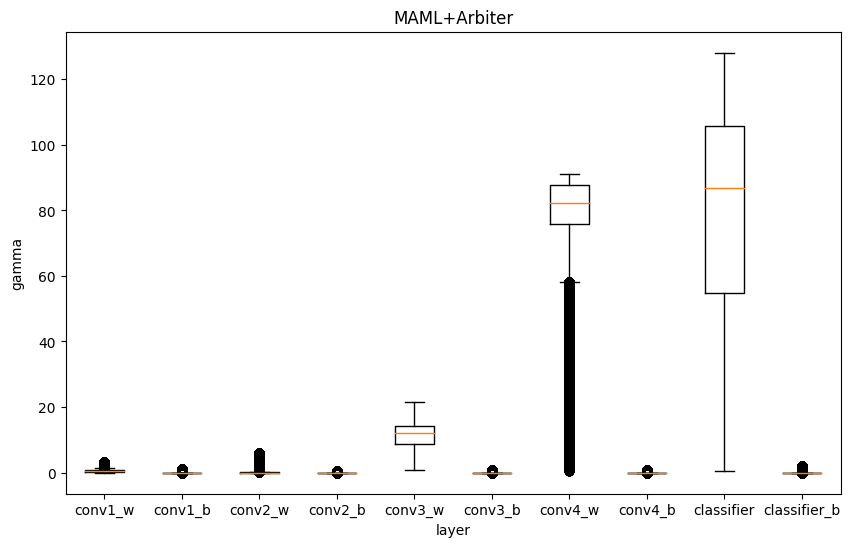

In [6]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = ['layer_dict.conv0.conv.weight_alpha', 
                   'layer_dict.conv0.conv.bias_alpha' ,
                   'layer_dict.conv1.conv.weight_alpha',
                   'layer_dict.conv1.conv.bias_alpha' ,
                   'layer_dict.conv2.conv.weight_alpha',
                   'layer_dict.conv2.conv.bias_alpha' ,
                   'layer_dict.conv3.conv.weight_alpha',
                   'layer_dict.conv3.conv.bias_alpha' ,
                   'layer_dict.linear.weights_alpha',
                   'layer_dict.linear.bias_alpha']
columns_to_plot_label = ['conv1_w', 'conv1_b',
                         'conv2_w', 'conv2_b',
                         'conv3_w', 'conv3_b',
                         'conv4_w', 'conv4_b',
                         'classifier', 'classifier_b']

# 여러 컬럼에 대한 박스 플롯을 한 번에 그리기
plt.figure(figsize=(10, 6))  # 그래프 전체 크기 설정 (선택 사항)

# 각 컬럼에 대한 박스 플롯 그리기
plt.boxplot(norm_info_train[columns_to_plot].values, labels=columns_to_plot_label)
plt.xlabel('layer')    # x축 라벨 설정
plt.ylabel('gamma')    # y축 라벨 설정
plt.title('MAML+Arbiter')   # 그래프 제목 설정

plt.show()

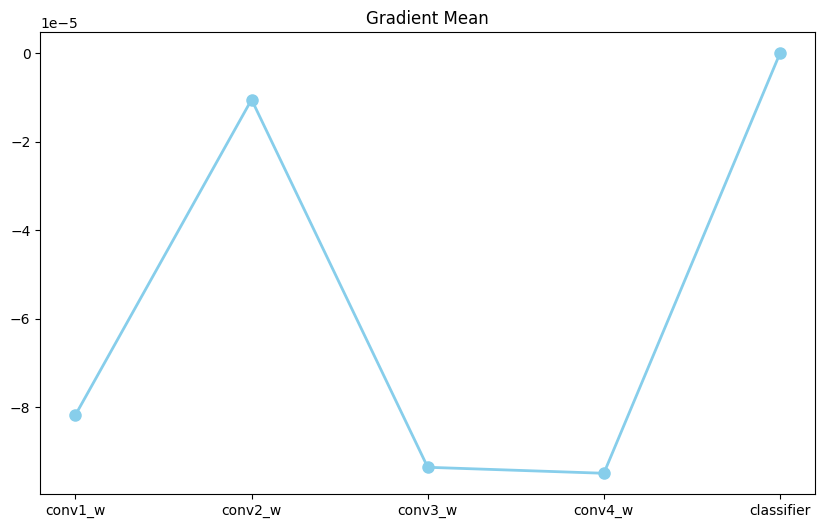

In [7]:
keyword = 'grad_mean'  # 추출하고 싶은 단어
exclude_word = 'bias'  # 제외하고자 하는 단어
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

grad_mean = {key: value for key, value in column_means.items() if keyword in key}
grad_mean = {key: value for key, value in grad_mean.items() if exclude_word not in key}

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(columns_to_plot_label, grad_mean.values(), marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.title('Gradient Mean')
# plt.xlabel('Column')
# plt.ylabel('mean')
plt.xticks(rotation=0)
plt.show()

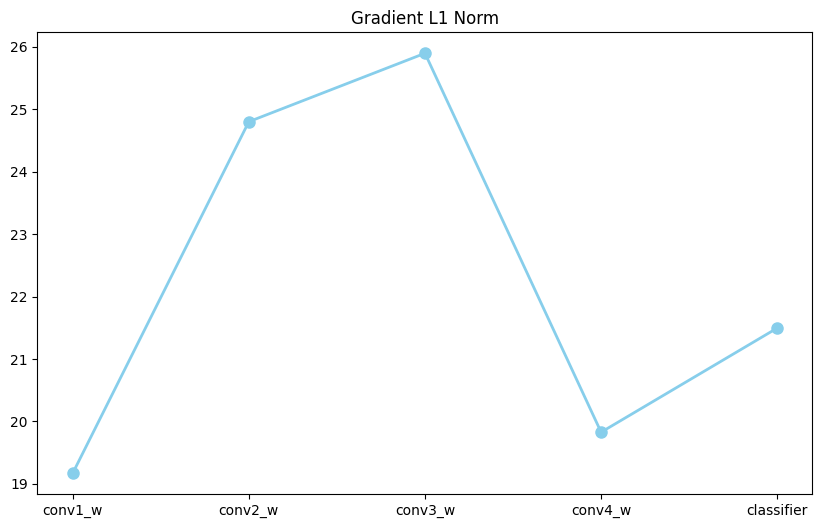

In [8]:
keyword = 'grad_L1norm'  # 추출하고 싶은 단어
exclude_word = 'bias'  # 제외하고자 하는 단어
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

grad_L1norm = {key: value for key, value in column_means.items() if keyword in key}
grad_L1norm = {key: value for key, value in grad_L1norm.items() if exclude_word not in key}

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(columns_to_plot_label, grad_L1norm.values(), marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.title('Gradient L1 Norm')
# plt.xlabel('Column')
# plt.ylabel('mean')
plt.xticks(rotation=0)
plt.show()

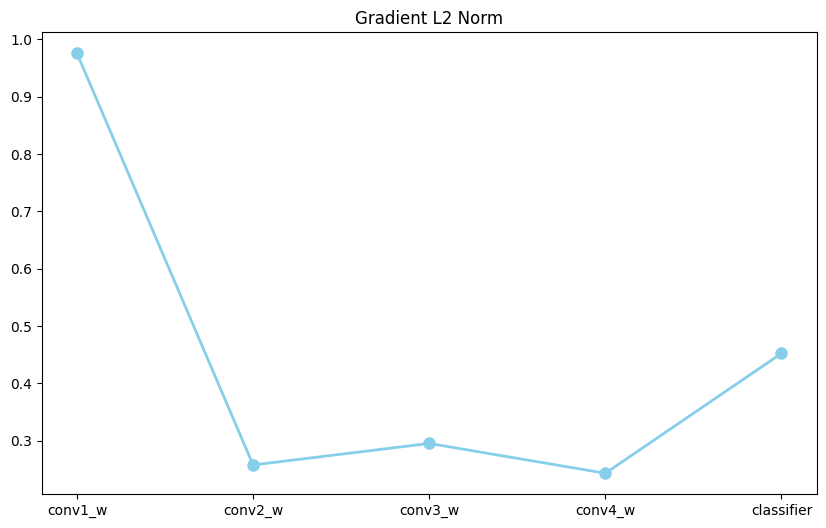

In [9]:
keyword = 'grad_L2norm'  # 추출하고 싶은 단어
exclude_word = 'bias'  # 제외하고자 하는 단어
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

grad_L2norm = {key: value for key, value in column_means.items() if keyword in key}
grad_L2norm = {key: value for key, value in grad_L2norm.items() if exclude_word not in key}

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(columns_to_plot_label, grad_L2norm.values(), marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.title('Gradient L2 Norm')
# plt.xlabel('Column')
# plt.ylabel('mean')
plt.xticks(rotation=0)
plt.show()

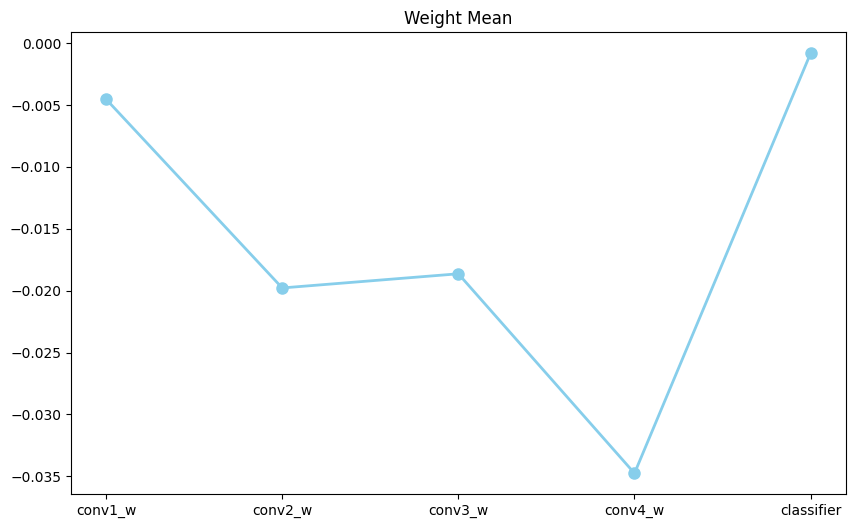

In [10]:
keyword = 'weight_mean'  # 추출하고 싶은 단어
exclude_word = 'bias'  # 제외하고자 하는 단어
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

weight_mean = {key: value for key, value in column_means.items() if keyword in key}
weight_mean = {key: value for key, value in weight_mean.items() if exclude_word not in key}

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(columns_to_plot_label, weight_mean.values(), marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.title('Weight Mean')
# plt.xlabel('Column')
# plt.ylabel('mean')
plt.xticks(rotation=0)
plt.show()

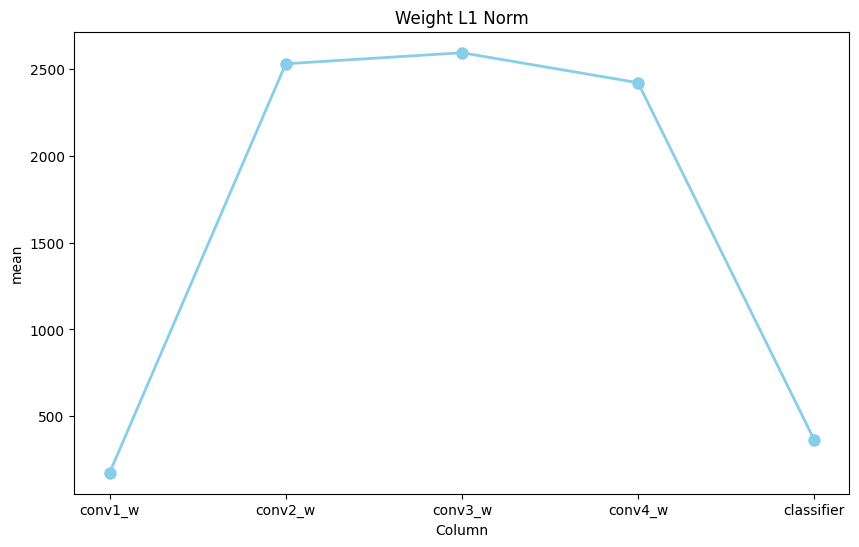

In [11]:
keyword = 'weight_L1norm'  # 추출하고 싶은 단어
exclude_word = 'bias'  # 제외하고자 하는 단어
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

weight_L1norm = {key: value for key, value in column_means.items() if keyword in key}
weight_L1norm = {key: value for key, value in weight_L1norm.items() if exclude_word not in key}

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(columns_to_plot_label, weight_L1norm.values(), marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.title('Weight L1 Norm')
plt.xlabel('Column')
plt.ylabel('mean')
plt.xticks(rotation=0)
plt.show()

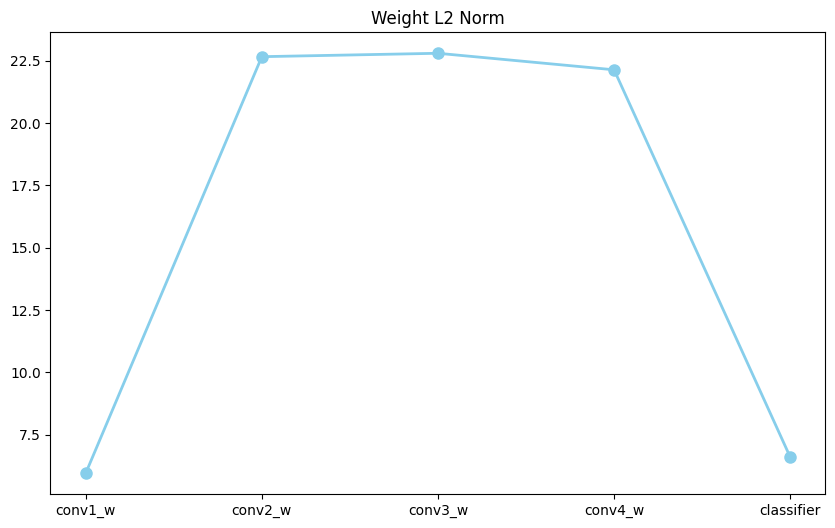

In [12]:
keyword = 'weight_L2norm'  # 추출하고 싶은 단어
exclude_word = 'bias'  # 제외하고자 하는 단어
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

weight_L2norm = {key: value for key, value in column_means.items() if keyword in key}
weight_L2norm = {key: value for key, value in weight_L2norm.items() if exclude_word not in key}

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(columns_to_plot_label, weight_L2norm.values(), marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.title('Weight L2 Norm')
# plt.xlabel('Column')
# plt.ylabel('mean')
plt.xticks(rotation=0)
plt.show()

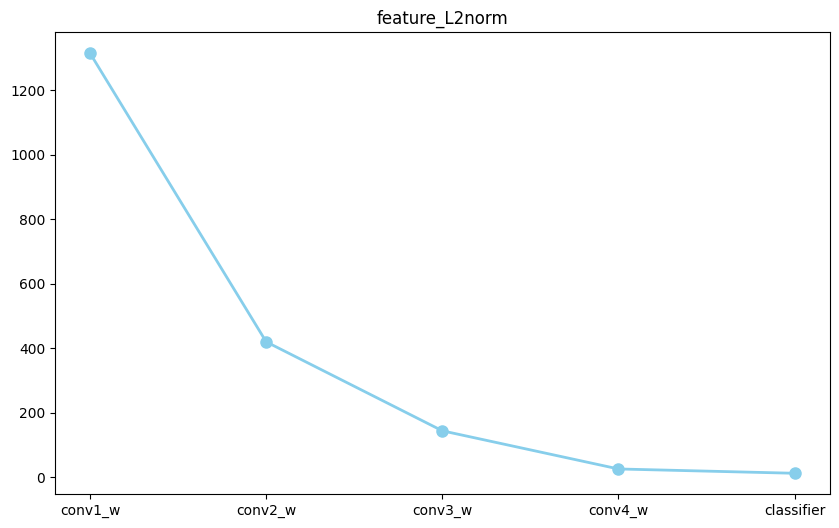

In [13]:
keyword = 'feature_L2norm'  # 추출하고 싶은 단어
exclude_word = 'bias'  # 제외하고자 하는 단어
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

feature_L2norm = {key: value for key, value in column_means.items() if keyword in key}
feature_L2norm = {key: value for key, value in feature_L2norm.items() if exclude_word not in key}

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(columns_to_plot_label, feature_L2norm.values(), marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.title('feature_L2norm')
# plt.xlabel('Column')
# plt.ylabel('mean')
plt.xticks(rotation=0)
plt.show()

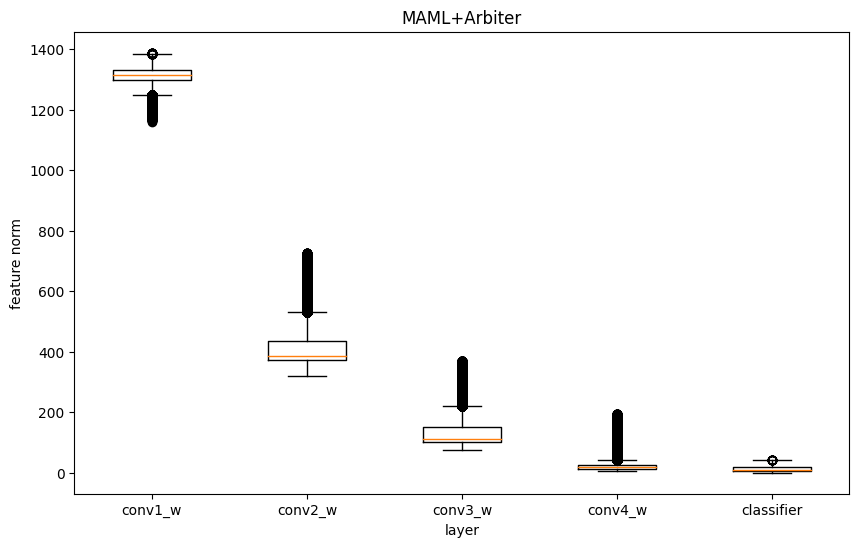

In [14]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = ['layer_dict.conv0_feature_L2norm', 'layer_dict.conv1_feature_L2norm','layer_dict.conv2_feature_L2norm','layer_dict.conv3_feature_L2norm','layer_dict.linear_feature_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 여러 컬럼에 대한 박스 플롯을 한 번에 그리기
plt.figure(figsize=(10, 6))  # 그래프 전체 크기 설정 (선택 사항)

# 각 컬럼에 대한 박스 플롯 그리기
plt.boxplot(norm_info_train[columns_to_plot].values, labels=columns_to_plot_label)
plt.xlabel('layer')    # x축 라벨 설정
plt.ylabel('feature norm')    # y축 라벨 설정
plt.title('MAML+Arbiter')   # 그래프 제목 설정

plt.show()